### Crossvalidation Example

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot
import numpy as np

Using TensorFlow backend.


In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X,y = utils.X_y_split(df)

### Crossvalidation on all models

In [7]:
models = {
    "KerasNN_not_fitted" : KerasNN_not_fitted(),
    "GaussianNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "ComplementNB" : ComplementNB(),
    "SVC" : SVC(), 
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression(),
    "SGDClassifier" : SGDClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(criterion="gini", class_weight=None),
    "XGBClassifier" : XGBClassifier(colsample_by_tree=0.1,
                                  learning_rate=0.89,
                                  max_depth=8,
                               n_estimators=10000,
                                  eval_metric="auc",                                
                                  n_jobs=-1, silent=0, verbose=0),
    "MLPClassifier" : MLPClassifier(hidden_layer_sizes=(10), solver = "lbfgs", max_iter=1000, random_state=42)
    "LinearRegression" : LinearRegression()
}

Instructions for updating:
Colocations handled automatically by placer.


/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:59: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))


In [8]:
seed=0
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=seed, ratio=0.5)
#resamp_x, resamp_y= ros.fit_resample(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

{'KerasNN_not_fitted': 0.149,
 'GaussianNB': 0.214,
 'MultinomialNB': 0.183,
 'ComplementNB': 0.184,
 'SVC': -1.856,
 'LinearSVC': 0.0,
 'LogisticRegression': -0.252,
 'SGDClassifier': 0.0,
 'KNeighborsClassifier': -0.583,
 'DecisionTreeClassifier': 0.255,
 'XGBClassifier': 0.368,
 'MLPClassifier': -125.25}

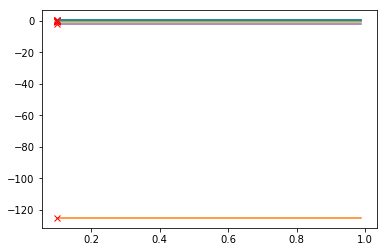

In [11]:
utils.Cross_Val_Models(models, X, y, sampling_technique=ros, scaler=scaler)

In [ ]:
utils.cross_validation_average_results(GaussianNB(), X, y, scaler=scaler, sampling_technique=ros)

In [ ]:
models = {
    "GaussianNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "ComplementNB" : ComplementNB(),
    "SVC" : SVC(), 
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression(),
    "SGDClassifier" : SGDClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(criterion="gini", class_weight=None)
}

In [ ]:
utils.Cross_Val_Models(models, X, y, scaler, n_splits=5, sampling_technique=ros)

In [ ]:
utils.Cross_Val_Models(models, X, y, n_splits=5, scaler=scaler)

### Leave One out Cross Validation

In [ ]:
%%capture
for model in models.keys():
    y_predicted = utils.leave_one_out_cross_validation_average_results(models[model], X, y, n_splits=5,scaler=scaler)
    threshold = utils.max_threshold(y_predicted, y, threshold_range = (0.1, 0.99),iterations=1000, visualization=True)
    y_pred = utils.predict_with_threshold(y_predicted,threshold)
    results[model] = utils.profit_share(y_predicted, y)
print(results)

In [ ]:
results